Let's first explore the defenders in the box, and its relations with covered yards and actual distanse run by rusher. 

In [5]:
#Import necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
df.columns #Checking the columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

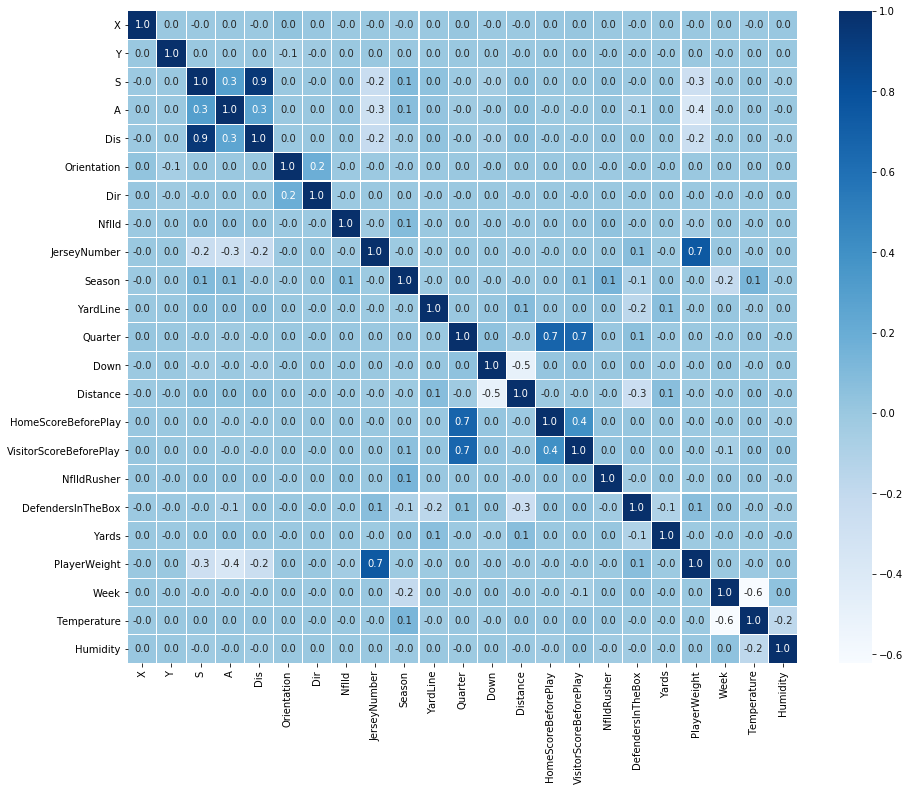

In [6]:
#Checking the correlations between the different features 

fig,ax = plt.subplots(figsize=(15,12))
corr_featurs = df.iloc[:,2:].corr()

sns.heatmap(corr_featurs, ax=ax, annot=True, linewidths=0.1, fmt='.1f', cmap="Blues")

plt.show()

It seems that there are only few features have direct but weak correlations with yards coverd in each play, and one of them is the number of defenders in the box, which I'd like to explore more in details with its relations with covered yards, and as well as with the actual distance that the rusher traveled from prior time point. 

In [7]:
#The defenders in the box in each play and the yards covered by the offense team and rusher's running actual distanse
df_defenders = df[df.NflId==df.NflIdRusher].loc[:,['PlayId','DefendersInTheBox', 'Yards', 'Dis']]
df_defenders.head()

,PlayId,DefendersInTheBox,Yards,Dis
18,20170907000118,6.0,8,0.38
40,20170907000139,6.0,3,0.34
62,20170907000189,7.0,5,0.60
84,20170907000345,9.0,2,0.46
98,20170907000395,7.0,7,0.44


In [8]:
#The average covered yards and rusher’s traveled distance in facing different number of defenders in the box 
defenders_vs_rusher = df_defenders.groupby('DefendersInTheBox')[['Yards', 'Dis']].mean()
defenders_vs_rusher

,Yards,Dis
DefendersInTheBox,,
2.0,15.500000,0.405000
3.0,10.416667,0.299583
4.0,7.108434,0.367831
5.0,5.546614,0.408430
6.0,4.679530,0.436311
7.0,4.238575,0.454119
8.0,3.640726,0.454403
9.0,2.739691,0.446881
10.0,0.777293,0.453843


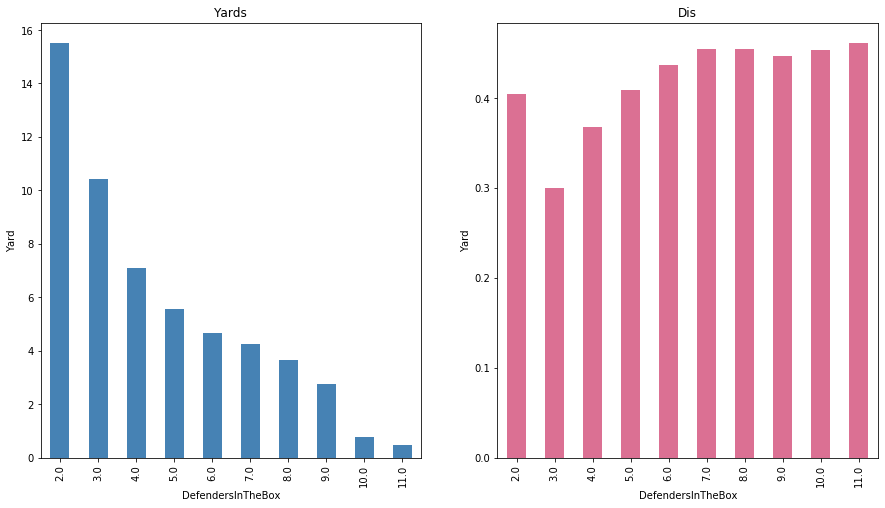

In [9]:
#Plot the yards coverd in each play and rusher's running distance facing different number of defenders in the box

fig, axs = plt.subplots(1, 2, figsize=(15,8))

defenders_vs_rusher["Yards"].plot(ax=axs[0], color='steelblue', kind='bar')
axs[0].set_title('Yards')

defenders_vs_rusher["Dis"].plot(ax=axs[1], color='palevioletred', kind='bar')
axs[1].set_title('Dis')

axs[0].set_ylabel('Yard')
axs[1].set_ylabel('Yard')


plt.show()

It looks like Yards have stronger relation with the number of defenders in the box than the actual distace run by the rusher.

In [10]:
#Preparing data for the box plot of Yards under different number of defenders in the box

dfY_2 = df_defenders[df_defenders.DefendersInTheBox==2]['Yards']
dfY_3 = df_defenders[df_defenders.DefendersInTheBox==3]['Yards']
dfY_4 = df_defenders[df_defenders.DefendersInTheBox==4]['Yards']
dfY_5 = df_defenders[df_defenders.DefendersInTheBox==5]['Yards']
dfY_6 = df_defenders[df_defenders.DefendersInTheBox==6]['Yards']
dfY_7 = df_defenders[df_defenders.DefendersInTheBox==7]['Yards']
dfY_8 = df_defenders[df_defenders.DefendersInTheBox==8]['Yards']
dfY_9 = df_defenders[df_defenders.DefendersInTheBox==9]['Yards']
dfY_10 = df_defenders[df_defenders.DefendersInTheBox==10]['Yards']
dfY_11 = df_defenders[df_defenders.DefendersInTheBox==11]['Yards']

num_dfY = [dfY_2, dfY_3, dfY_4, dfY_5, dfY_6, dfY_7, dfY_8, dfY_9, dfY_10, dfY_11 ]
labels_Y=['dfY_2', 'dfY_3', 'dfY_4', 'dfY_5', 'dfY_6', 'dfY_7', 'dfY_8', 'dfY_9', 'dfY_10', 'dfY_11']

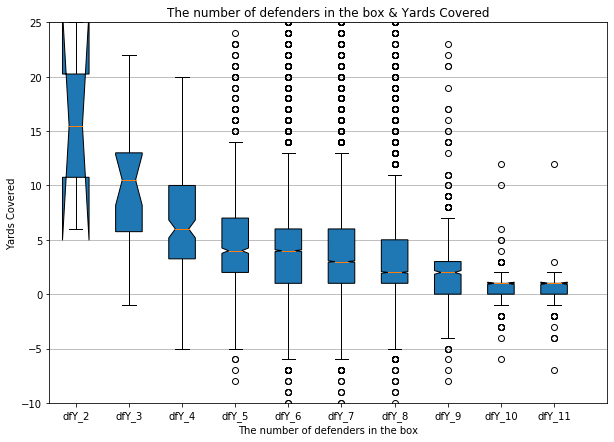

In [11]:
#Creating boxplots for yards covered in a play with the different number of defenders in the box

fig, ax = plt.subplots(1, figsize=(10, 7)) 

bp = ax.boxplot(num_dfY, notch=True, labels=labels_Y,
                         vert=True, patch_artist=True)
ax.set_title('The number of defenders in the box & Yards Covered')
ax.set_xlabel('The number of defenders in the box')
ax.set_ylabel('Yards Covered')
ax.yaxis.grid(True)

#Zoom up  
x1, x2, y1, y2 = 0.5, 11, -10, 25

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

plt.show()

In [12]:
#Create a dataframe that contains descriptive statistics of yards under different number of defenders in the box

yards_form = pd.DataFrame({'OffenseFormation': labels_Y, 
                                'Mean': list((np.mean(dfY) for dfY in num_dfY)),
                                'Std': list((np.std(dfY) for dfY in num_dfY)), 
                                'count': list((len(dfY) for dfY in num_dfY))})

#The confidience interval in 95% level

yards_form['lower_95'] = yards_form['Mean'] - 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form['upper_95'] = yards_form['Mean'] + 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form

,OffenseFormation,Mean,Std,count,lower_95,upper_95
0,dfY_2,15.500000,9.500000,2,2.333672,28.666328
1,dfY_3,10.416667,6.284350,24,7.902403,12.930930
2,dfY_4,7.108434,6.307410,166,6.148916,8.067952
3,dfY_5,5.546614,7.434142,1019,5.090157,6.003071
4,dfY_6,4.679530,6.340822,9536,4.552262,4.806798
5,dfY_7,4.238575,6.345474,12713,4.128269,4.348880
6,dfY_8,3.640726,6.516548,6335,3.480254,3.801199
7,dfY_9,2.739691,7.513683,776,2.211029,3.268353
8,dfY_10,0.777293,2.536753,229,0.448731,1.105854
9,dfY_11,0.451456,1.446480,206,0.253926,0.648987


In [13]:
#Preparing data for the box plot of rusher's running distance under different number of defenders in the box

dfd_2 = df_defenders[df_defenders.DefendersInTheBox==2]['Dis']
dfd_3 = df_defenders[df_defenders.DefendersInTheBox==3]['Dis']
dfd_4 = df_defenders[df_defenders.DefendersInTheBox==4]['Dis']
dfd_5 = df_defenders[df_defenders.DefendersInTheBox==5]['Dis']
dfd_6 = df_defenders[df_defenders.DefendersInTheBox==6]['Dis']
dfd_7 = df_defenders[df_defenders.DefendersInTheBox==7]['Dis']
dfd_8 = df_defenders[df_defenders.DefendersInTheBox==8]['Dis']
dfd_9 = df_defenders[df_defenders.DefendersInTheBox==9]['Dis']
dfd_10 = df_defenders[df_defenders.DefendersInTheBox==10]['Dis']
dfd_11 = df_defenders[df_defenders.DefendersInTheBox==11]['Dis']

num_dfd = [dfd_2, dfd_3, dfd_4, dfd_5, dfd_6, dfd_7, dfd_8, dfd_9, dfd_10, dfd_11 ]
labels_D=['dfd_2', 'dfd_3', 'dfd_4', 'dfd_5', 'dfd_6', 'dfd_7', 'dfd_8', 'dfd_9', 'dfd_10', 'dfd_11']

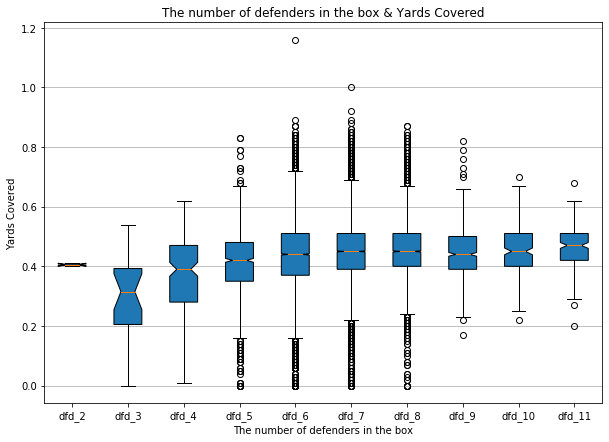

In [14]:
#Creating boxplots of rusher's running distance in a play with the different number of defenders in the box

fig, ax = plt.subplots(1, figsize=(10, 7)) 

bp = ax.boxplot(num_dfd, notch=True, labels=labels_D,
                         vert=True, patch_artist=True)
ax.set_title('The number of defenders in the box & Yards Covered')
ax.set_xlabel('The number of defenders in the box')
ax.set_ylabel('Yards Covered')
ax.yaxis.grid(True)

plt.show()

In [15]:
#Create a dataframe that contains descriptive statistics of rusher's running distance under different number of defenders in the box

yards_form = pd.DataFrame({'OffenseFormation': labels_D, 
                                'Mean': list((np.mean(dfD) for dfD in num_dfd)),
                                'Std': list((np.std(dfD) for dfD in num_dfd)), 
                                'count': list((len(dfD) for dfD in num_dfd))})

#The confidience interval in 95% level

yards_form['lower_95'] = yards_form['Mean'] - 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form['upper_95'] = yards_form['Mean'] + 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form




,OffenseFormation,Mean,Std,count,lower_95,upper_95
0,dfd_2,0.405000,0.005000,2,0.398070,0.411930
1,dfd_3,0.299583,0.140460,24,0.243388,0.355779
2,dfd_4,0.367831,0.128378,166,0.348302,0.387361
3,dfd_5,0.408430,0.124672,1019,0.400775,0.416085
4,dfd_6,0.436311,0.117701,9536,0.433948,0.438673
5,dfd_7,0.454119,0.105055,12713,0.452292,0.455945
6,dfd_8,0.454403,0.091788,6335,0.452142,0.456663
7,dfd_9,0.446881,0.083722,776,0.440991,0.452772
8,dfd_10,0.453843,0.082277,229,0.443186,0.464499
9,dfd_11,0.460825,0.075233,206,0.450551,0.471099


In [16]:
#Create a colum of the normalised difference from the mean for yards covered when facing different number of defenders in the box
defenders_vs_rusher['NDFM_Yards'] = (defenders_vs_rusher.Yards - defenders_vs_rusher.Yards.mean()) / defenders_vs_rusher.Yards.mean()

#Create a colum of the normalised difference from the mean for rusher's running distance when facing different number of defenders in the box
defenders_vs_rusher['NDFM_Dis'] = (defenders_vs_rusher.Dis - defenders_vs_rusher.Dis.mean()) / defenders_vs_rusher.Dis.mean()

defenders_vs_rusher = defenders_vs_rusher.reset_index()

defenders_vs_rusher

,DefendersInTheBox,Yards,Dis,NDFM_Yards,NDFM_Dis
0,2.0,15.500000,0.405000,1.813119,-0.032773
1,3.0,10.416667,0.299583,0.890537,-0.284530
2,4.0,7.108434,0.367831,0.290121,-0.121539
3,5.0,5.546614,0.408430,0.006664,-0.024581
4,6.0,4.679530,0.436311,-0.150705,0.042004
5,7.0,4.238575,0.454119,-0.230735,0.084533
6,8.0,3.640726,0.454403,-0.339239,0.085211
7,9.0,2.739691,0.446881,-0.502769,0.067249
8,10.0,0.777293,0.453843,-0.858928,0.083875
9,11.0,0.451456,0.460825,-0.918064,0.100550


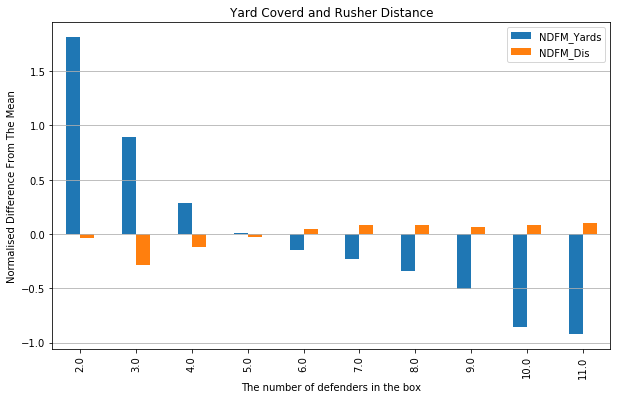

In [17]:
#Create a bar plot for the normalised difference from the mean for yards and rusher's running distance under different number of defenders in the box

fig, ax = plt.subplots(1, figsize=(10, 6))

defenders_vs_rusher.plot(x='DefendersInTheBox', y=['NDFM_Yards', 'NDFM_Dis'], ax=ax, kind='bar') 

ax.set_title('Yard Coverd and Rusher Distance')
ax.set_xlabel('The number of defenders in the box')
ax.set_ylabel('Normalised Difference From The Mean')
ax.yaxis.grid(True)

plt.show()
